Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

#### Load the data

In [1]:
!pip install category_encoders==2.*
!pip install eli5

In [23]:
import pandas as pd
import numpy as np

#### cover type data set

In [71]:

col_hdrs =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
           'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
           'Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
           'Horizontal_Distance_To_Fire_Points',
           'Wilderness_Area_Rawah','Wilderness_Area_Neota',
           'Wilderness_Area_Comanche_Peak','Wilderness_Area_Cache_la_Poudre',
           'Soil_Type_2702','Soil_Type_2703','Soil_Type_2704','Soil_Type_2705','Soil_Type_2706',
           'Soil_Type_2717','Soil_Type_3501','Soil_Type_3502','Soil_Type_4201','Soil_Type_4703',
           'Soil_Type_4704','Soil_Type_4744','Soil_Type_4758','Soil_Type_5101','Soil_Type_5151',
           'Soil_Type_6101','Soil_Type_6102','Soil_Type_6731','Soil_Type_7101','Soil_Type_7102',
           'Soil_Type_7103','Soil_Type_7201','Soil_Type_7202','Soil_Type_7700','Soil_Type_7701',
           'Soil_Type_7702','Soil_Type_7709','Soil_Type_7710','Soil_Type_7745','Soil_Type_7746',
           'Soil_Type_7755','Soil_Type_7756','Soil_Type_7757','Soil_Type_7790','Soil_Type_8703',
           'Soil_Type_8707','Soil_Type_8708','Soil_Type_8771','Soil_Type_8772','Soil_Type_8776',
           
            'Forest_Cover']
df = pd.read_csv('covtype.data',header=None,names=col_hdrs)

In [62]:
df[['Wilderness_Area_Rawah','Wilderness_Area_Neota',
           'Wilderness_Area_Comanche_Peak','Wilderness_Area_Cache_la_Poudre',]].head()

,Wilderness_Area_Rawah,Wilderness_Area_Neota,Wilderness_Area_Comanche_Peak,Wilderness_Area_Cache_la_Poudre
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [66]:
df.shape

(581012, 55)

In [64]:
df['Wilderness_Area_Rawah'].value_counts()

0    320216
1    260796
Name: Wilderness_Area_Rawah, dtype: int64

In [72]:
Wilderness_Area_Rawah_map ={1:'Rawah', 0:''}
Wilderness_Area_Neota_map ={1:'Neota', 0:''}
Wilderness_Area_Comanche_Peak_map ={1:'Comanche Peak', 0:''}
Wilderness_Area_Cache_la_Poudre_map ={1:'Cache la Poudre', 0:''}
df['Wilderness_Area_Rawah'] = df['Wilderness_Area_Rawah'].map(Wilderness_Area_Rawah_map)
df['Wilderness_Area_Neota'] = df['Wilderness_Area_Neota'].map(Wilderness_Area_Neota_map)
df['Wilderness_Area_Comanche_Peak'] = df['Wilderness_Area_Comanche_Peak'].map(Wilderness_Area_Comanche_Peak_map)
df['Wilderness_Area_Cache_la_Poudre'] = df['Wilderness_Area_Cache_la_Poudre'].map(Wilderness_Area_Cache_la_Poudre_map)

In [73]:
df['Wilderness_Area'] = df['Wilderness_Area_Rawah'] + df['Wilderness_Area_Neota'] + df['Wilderness_Area_Comanche_Peak'] + df['Wilderness_Area_Cache_la_Poudre']

In [74]:
df['Wilderness_Area'].value_counts()

Rawah              260796
Comanche Peak      253364
Cache la Poudre     36968
Neota               29884
Name: Wilderness_Area, dtype: int64

In [55]:
df['Wilderness_Area_Neota'].value_counts()

         551128
Neota     29884
Name: Wilderness_Area_Neota, dtype: int64

In [58]:
df['Soil_Type_2702'].value_counts()

0    577981
1      3031
Name: Soil_Type_2702, dtype: int64

In [75]:
Soil_Type_2702_map = {1:'2702', 0:''}
Soil_Type_2703_map = {1:'2703', 0:''}
Soil_Type_2704_map = {1:'2704', 0:''}
Soil_Type_2705_map = {1:'2705', 0:''}
Soil_Type_2706_map = {1:'2706', 0:''}

Soil_Type_2717_map = {1:'2717', 0:''}
Soil_Type_3501_map = {1:'3501', 0:''}
Soil_Type_3502_map = {1:'3502', 0:''}
Soil_Type_4201_map = {1:'4201', 0:''}
Soil_Type_4703_map = {1:'4703', 0:''}

Soil_Type_4704_map = {1:'4704', 0:''}
Soil_Type_4744_map = {1:'4744', 0:''}
Soil_Type_4758_map = {1:'4758', 0:''}
Soil_Type_5101_map = {1:'5101', 0:''}
Soil_Type_5151_map = {1:'5151', 0:''}

Soil_Type_6101_map = {1:'6101', 0:''}
Soil_Type_6102_map = {1:'6102', 0:''}
Soil_Type_6731_map = {1:'6731', 0:''}
Soil_Type_7101_map = {1:'7101', 0:''}
Soil_Type_7102_map = {1:'7102', 0:''}

Soil_Type_7103_map = {1:'7103', 0:''}
Soil_Type_7201_map = {1:'7201', 0:''}
Soil_Type_7202_map = {1:'7202', 0:''}
Soil_Type_7700_map = {1:'7700', 0:''}
Soil_Type_7701_map = {1:'7701', 0:''}

Soil_Type_7702_map = {1:'7702', 0:''}
Soil_Type_7709_map = {1:'7709', 0:''}
Soil_Type_7710_map = {1:'7710', 0:''}
Soil_Type_7745_map = {1:'7745', 0:''}
Soil_Type_7746_map = {1:'7746', 0:''}

Soil_Type_7755_map = {1:'7755', 0:''}
Soil_Type_7756_map = {1:'7756', 0:''}
Soil_Type_7757_map = {1:'7757', 0:''}
Soil_Type_7790_map = {1:'7790', 0:''}
Soil_Type_8703_map = {1:'8703', 0:''}

Soil_Type_8707_map = {1:'8707', 0:''}
Soil_Type_8708_map = {1:'8708', 0:''}
Soil_Type_8771_map = {1:'8771', 0:''}
Soil_Type_8772_map = {1:'8772', 0:''}
Soil_Type_8776_map = {1:'8776', 0:''}

df['Soil_Type_2702'] = df['Soil_Type_2702'].map(Soil_Type_2702_map)
df['Soil_Type_2703'] = df['Soil_Type_2703'].map(Soil_Type_2703_map)
df['Soil_Type_2704'] = df['Soil_Type_2704'].map(Soil_Type_2704_map)
df['Soil_Type_2705'] = df['Soil_Type_2705'].map(Soil_Type_2705_map)
df['Soil_Type_2706'] = df['Soil_Type_2706'].map(Soil_Type_2706_map)

df['Soil_Type_2717'] = df['Soil_Type_2717'].map(Soil_Type_2717_map)
df['Soil_Type_3501'] = df['Soil_Type_3501'].map(Soil_Type_3501_map)
df['Soil_Type_3502'] = df['Soil_Type_3502'].map(Soil_Type_3502_map)
df['Soil_Type_4201'] = df['Soil_Type_4201'].map(Soil_Type_4201_map)
df['Soil_Type_4703'] = df['Soil_Type_4703'].map(Soil_Type_4703_map)

df['Soil_Type_4704'] = df['Soil_Type_4704'].map(Soil_Type_4704_map)
df['Soil_Type_4744'] = df['Soil_Type_4744'].map(Soil_Type_4744_map)
df['Soil_Type_4758'] = df['Soil_Type_4758'].map(Soil_Type_4758_map)
df['Soil_Type_5101'] = df['Soil_Type_5101'].map(Soil_Type_5101_map)
df['Soil_Type_5151'] = df['Soil_Type_5151'].map(Soil_Type_5151_map)

df['Soil_Type_6101'] = df['Soil_Type_6101'].map(Soil_Type_6101_map)
df['Soil_Type_6102'] = df['Soil_Type_6102'].map(Soil_Type_6102_map)
df['Soil_Type_6731'] = df['Soil_Type_6731'].map(Soil_Type_6731_map)
df['Soil_Type_7101'] = df['Soil_Type_7101'].map(Soil_Type_7101_map)
df['Soil_Type_7102'] = df['Soil_Type_7102'].map(Soil_Type_7102_map)

df['Soil_Type_7103'] = df['Soil_Type_7103'].map(Soil_Type_7103_map)
df['Soil_Type_7201'] = df['Soil_Type_7201'].map(Soil_Type_7201_map)
df['Soil_Type_7202'] = df['Soil_Type_7202'].map(Soil_Type_7202_map)
df['Soil_Type_7700'] = df['Soil_Type_7700'].map(Soil_Type_7700_map)
df['Soil_Type_7701'] = df['Soil_Type_7701'].map(Soil_Type_7701_map)

df['Soil_Type_7702'] = df['Soil_Type_7702'].map(Soil_Type_7702_map)
df['Soil_Type_7709'] = df['Soil_Type_7709'].map(Soil_Type_7709_map)
df['Soil_Type_7710'] = df['Soil_Type_7710'].map(Soil_Type_7710_map)
df['Soil_Type_7745'] = df['Soil_Type_7745'].map(Soil_Type_7745_map)
df['Soil_Type_7746'] = df['Soil_Type_7746'].map(Soil_Type_7746_map)

df['Soil_Type_7755'] = df['Soil_Type_7755'].map(Soil_Type_7755_map)
df['Soil_Type_7756'] = df['Soil_Type_7756'].map(Soil_Type_7756_map)
df['Soil_Type_7757'] = df['Soil_Type_7757'].map(Soil_Type_7757_map)
df['Soil_Type_7790'] = df['Soil_Type_7790'].map(Soil_Type_7790_map)
df['Soil_Type_8703'] = df['Soil_Type_8703'].map(Soil_Type_8703_map)

df['Soil_Type_8707'] = df['Soil_Type_8707'].map(Soil_Type_8707_map)
df['Soil_Type_8708'] = df['Soil_Type_8708'].map(Soil_Type_8708_map)
df['Soil_Type_8771'] = df['Soil_Type_8771'].map(Soil_Type_8771_map)
df['Soil_Type_8772'] = df['Soil_Type_8772'].map(Soil_Type_8772_map)
df['Soil_Type_8776'] = df['Soil_Type_8776'].map(Soil_Type_8776_map)


In [60]:
df['Soil_Type_2702'].value_counts()

        577981
2702      3031
Name: Soil_Type_2702, dtype: int64

In [67]:
df['Wilderness_Area'] = (df['Wilderness_Area_Rawah'] + df['Wilderness_Area_Neota'] + 
                         df['Wilderness_Area_Comanche_Peak'] + 
                         df['Wilderness_Area_Cache_la_Poudre'])

In [68]:
df['Wilderness_Area'].value_counts()

1    581012
Name: Wilderness_Area, dtype: int64

In [76]:
df['Soil_Type'] = (df['Soil_Type_2702']+
                   df['Soil_Type_2703']+
                    df['Soil_Type_2704']+
                   df['Soil_Type_2705']+
                df['Soil_Type_2706']+
df['Soil_Type_2717']+
df['Soil_Type_3501']+
df['Soil_Type_3502']+
df['Soil_Type_4201']+
df['Soil_Type_4703']+
   
df['Soil_Type_4704']+
df['Soil_Type_4744']+
df['Soil_Type_4758']+
df['Soil_Type_5101']+
df['Soil_Type_5151']+
df['Soil_Type_6101']+
df['Soil_Type_6102']+
df['Soil_Type_6731']+
df['Soil_Type_7101']+
df['Soil_Type_7102']+
   
df['Soil_Type_7103']+
df['Soil_Type_7201']+
df['Soil_Type_7202']+
df['Soil_Type_7700']+
df['Soil_Type_7701']+
   
df['Soil_Type_7702']+
df['Soil_Type_7709']+
df['Soil_Type_7710']+
df['Soil_Type_7745']+
df['Soil_Type_7746']+
   
df['Soil_Type_7755']+
df['Soil_Type_7756']+
df['Soil_Type_7757']+
df['Soil_Type_7790']+
df['Soil_Type_8703']+
   
df['Soil_Type_8707']+
df['Soil_Type_8708']+
df['Soil_Type_8771']+
df['Soil_Type_8772']+
df['Soil_Type_8776'])

In [77]:
df['Soil_Type'].value_counts()

7745    115247
7202     57752
7756     52519
7757     45154
7201     33373
4703     32634
7746     30170
4744     29971
7755     25666
7700     21278
4758     17431
8771     15573
8772     13806
4704     12410
2705     12396
7102      9259
8776      8750
2703      7525
2717      6575
2704      4823
7101      4021
6102      3422
2702      3031
6101      2845
7702      2589
6731      1899
8703      1891
7790      1611
2706      1597
4201      1147
7709      1086
7710       946
7103       838
5101       599
7701       474
8708       298
3502       179
8707       119
3501       105
5151         3
Name: Soil_Type, dtype: int64

In [78]:
df.shape

(581012, 57)

In [81]:
col_names=(['Wilderness_Area_Rawah','Wilderness_Area_Neota',
           'Wilderness_Area_Comanche_Peak','Wilderness_Area_Cache_la_Poudre',
           'Soil_Type_2702','Soil_Type_2703','Soil_Type_2704','Soil_Type_2705','Soil_Type_2706',
           'Soil_Type_2717','Soil_Type_3501','Soil_Type_3502','Soil_Type_4201','Soil_Type_4703',
           'Soil_Type_4704','Soil_Type_4744','Soil_Type_4758','Soil_Type_5101','Soil_Type_5151',
           'Soil_Type_6101','Soil_Type_6102','Soil_Type_6731','Soil_Type_7101','Soil_Type_7102',
           'Soil_Type_7103','Soil_Type_7201','Soil_Type_7202','Soil_Type_7700','Soil_Type_7701',
           'Soil_Type_7702','Soil_Type_7709','Soil_Type_7710','Soil_Type_7745','Soil_Type_7746',
           'Soil_Type_7755','Soil_Type_7756','Soil_Type_7757','Soil_Type_7790','Soil_Type_8703',
           'Soil_Type_8707','Soil_Type_8708','Soil_Type_8771','Soil_Type_8772','Soil_Type_8776'])
df_new = df.drop(columns=col_names)

In [83]:
df_new.shape

(581012, 13)

In [84]:
df_new.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Forest_Cover,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,5,Rawah,7745
1,2590,56,2,212,-6,390,220,235,151,6225,5,Rawah,7745
2,2804,139,9,268,65,3180,234,238,135,6121,2,Rawah,4744
3,2785,155,18,242,118,3090,238,238,122,6211,2,Rawah,7746
4,2595,45,2,153,-1,391,220,234,150,6172,5,Rawah,7745


In [87]:
df_new.to_csv('forest_cover.csv',index=False)

In [74]:
df['y'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: y, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_new, test_size=0.95, 
                              random_state=45,stratify=df['Forest_Cover'])

In [130]:
train.shape,test.shape

((29050, 55), (551962, 55))

In [90]:
train,val = train_test_split(train, test_size=0.2, 
                              random_state=45,stratify=train['Forest_Cover'])

In [91]:
train.shape,val.shape

((23240, 13), (5810, 13))

In [92]:
target = ['Forest_Cover']
# features =['x1','x2','x3']


X_train = train.drop(columns=target)
y_train = train[target]

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

In [93]:
X_train.shape , y_train.shape

((23240, 12), (23240, 1))

In [94]:
y_train.dtypes.T

Forest_Cover    int64
dtype: object

In [95]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import numpy as np
pipeline = make_pipeline(
  ce.OrdinalEncoder(),
  SimpleImputer(),
  RandomForestClassifier(n_estimators=100,random_state=45,n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train.values.reshape(-1,))
print(pipeline.score(X_val, y_val.values.reshape(-1,)))


0.8506024096385543


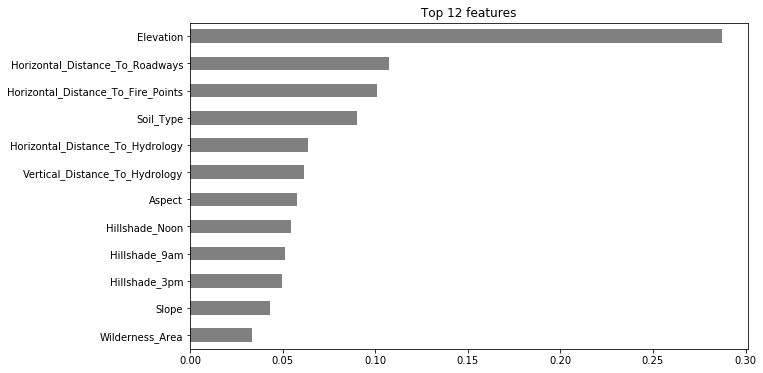

In [97]:
## default feature importance

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 12
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [98]:
### drop columns

column = ['Elevation']

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train.values.reshape(-1,))
score_without = pipeline.score(X_val.drop(columns=column), y_val.values.reshape(-1,))
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train.values.reshape(-1,))
score_with = pipeline.score(X_val, y_val.values.reshape(-1,))
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without ['Elevation']: 0.7967297762478486
Validation Accuracy with ['Elevation']: 0.8507745266781411
Drop-Column Importance for ['Elevation']: 0.054044750430292554


In [99]:
# permutation importance
# BEFORE: Sequence of the feature to be permuted
feature = 'Elevation'
X_val[feature].head()

569690    2824
402458    3141
499736    2963
249099    3020
29703     3129
Name: Elevation, dtype: int64

In [100]:
# BEFORE: Distribution of the feature to be permuted
X_val[feature].value_counts()

2959    24
2962    22
3191    21
2998    21
2978    21
2939    20
3070    20
3001    19
2968    18
3201    18
3103    17
2982    17
3175    17
2972    17
2995    17
3021    17
3041    16
2991    16
3108    16
3037    16
3182    15
3160    15
3004    15
3008    14
2900    14
3011    14
3112    14
3057    14
3185    14
3096    14
        ..
3380     1
2572     1
2592     1
2612     1
2628     1
2720     1
2744     1
3304     1
3328     1
3340     1
3352     1
3368     1
3372     1
3376     1
3388     1
3828     1
3396     1
3400     1
3404     1
3436     1
3448     1
3468     1
3496     1
3532     1
3576     1
3664     1
3688     1
3696     1
3736     1
2057     1
Name: Elevation, Length: 1243, dtype: int64

In [101]:
# PERMUTE!
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

In [102]:
# AFTER: Sequence has changed
X_val_permuted[feature].head()

569690    2890
402458    2981
499736    2929
249099    3153
29703     3255
Name: Elevation, dtype: int64

In [99]:
# AFTER: Distribution hasn't changed!
X_val_permuted[feature].value_counts()

2962    360
2988    353
2968    350
2955    328
2975    325
2991    325
2972    321
3004    319
2998    313
2959    310
2978    308
2985    307
2945    301
2982    300
2952    300
3011    298
3014    297
3001    296
2965    296
2995    295
3034    295
3008    292
2932    288
2942    288
3031    281
3021    280
2922    272
3018    268
2939    264
2919    263
       ... 
3635      1
3699      1
3739      1
1970      1
1945      1
1986      1
3608      1
3779      1
3587      1
3634      1
3698      1
3846      1
3590      1
3677      1
3567      1
3628      1
2015      1
3742      1
1901      1
3678      1
3550      1
3759      1
1948      1
3551      1
1949      1
3694      1
3758      1
3822      1
3612      1
3594      1
Name: Elevation, Length: 1804, dtype: int64

In [103]:
# Get the permutation importance
# Notice that we don't need to refit the pipeline here!
score_permuted = pipeline.score(X_val_permuted, y_val.values.reshape(-1,))

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with Elevation: 0.8507745266781411
Validation Accuracy with Elevation permuted: 0.5110154905335629
Permutation Importance: 0.33975903614457825


In [104]:
# Rerun the permutation importance process, but for a different feature
feature = 'Soil_Type'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with Soil_Type: 0.8507745266781411
Validation Accuracy with Soil_Type permuted: 0.774526678141136
Permutation Importance: 0.07624784853700517


In [105]:
# with eli5 library
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train.values.reshape(-1,))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [107]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [108]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

Elevation                             0.351119
Horizontal_Distance_To_Roadways       0.096730
Wilderness_Area                       0.089363
Soil_Type                             0.083614
Horizontal_Distance_To_Fire_Points    0.072324
Horizontal_Distance_To_Hydrology      0.032392
Vertical_Distance_To_Hydrology        0.021652
Hillshade_Noon                        0.016936
Hillshade_9am                         0.014699
Aspect                                0.013873
Hillshade_3pm                         0.007676
Slope                                 0.007022
dtype: float64

In [109]:
eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.3511 ± 0.0149,Elevation
0.0967 ± 0.0052,Horizontal_Distance_To_Roadways
0.0894 ± 0.0071,Wilderness_Area
0.0836 ± 0.0039,Soil_Type
0.0723 ± 0.0053,Horizontal_Distance_To_Fire_Points
0.0324 ± 0.0044,Horizontal_Distance_To_Hydrology
0.0217 ± 0.0052,Vertical_Distance_To_Hydrology
0.0169 ± 0.0034,Hillshade_Noon
0.0147 ± 0.0027,Hillshade_9am
0.0139 ± 0.0029,Aspect


In [110]:
# We can use importances for feature selection
print('Shape before removing features:', X_train.shape)

Shape before removing features: (23240, 12)


In [112]:
minimum_importance = 0.008
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

print('Shape after removing features:', X_train.shape)

Shape after removing features: (23240, 10)


In [113]:
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train.values.reshape(-1,))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8604130808950086


In [114]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [115]:
# Use xgboost for gradient boosting
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train.values.reshape(-1,))

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Wilderness_Area', 'Soil_Type'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Wilderness_Area',
                                          'data_type': dtype('O'),
                                          'mapping': Rawah              1
Cache la Poudre    2
Neota              3
Comanche Peak      4
NaN               -2
dtype: int64},
                                         {'col': 'Soil_Type',
                                          'data_type': dtype('O'),
                                          'mapping': 7745     1
7102...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
             

In [116]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.7401032702237521


In [119]:
#Understand the difference between boosting & bagging
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

X_train.shape, X_val.shape, X_train_encoded.shape, X_val_encoded.shape

((23240, 10), (5810, 10), (23240, 10), (5810, 10))

In [120]:
eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model = XGBClassifier(
    n_estimators=1000, # <= 1000 trees, depends on early stopping
    max_depth=7,       # try deeper trees because of high cardinality categoricals
    learning_rate=0.1, # try higher learning rate
    n_jobs=-1
)

model.fit(X_train_encoded, y_train.values.reshape(-1,), eval_set=eval_set, 
          eval_metric='merror', early_stopping_rounds=50)

//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-merror:0.231454	validation_1-merror:0.256454
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.223967	validation_1-merror:0.250947
[2]	validation_0-merror:0.216351	validation_1-merror:0.24716
[3]	validation_0-merror:0.212694	validation_1-merror:0.246644
[4]	validation_0-merror:0.210972	validation_1-merror:0.244578
[5]	validation_0-merror:0.209423	validation_1-merror:0.242685
[6]	validation_0-merror:0.207272	validation_1-merror:0.239931
[7]	validation_0-merror:0.204647	validation_1-merror:0.239243
[8]	validation_0-merror:0.203873	validation_1-merror:0.239587
[9]	validation_0-merror:0.201248	validation_1-merror:0.237349
[10]	validation_0-merror:0.199957	validation_1-merror:0.233907
[11]	validation_0-merror:0.197762	validation_1-merror:0.231842
[12]	validation_0-merror:0.195224	validation_1-merror:0.229604
[13]	validation_0-merror:0.19

[128]	validation_0-merror:0.103701	validation_1-merror:0.190534
[129]	validation_0-merror:0.103571	validation_1-merror:0.190878
[130]	validation_0-merror:0.102883	validation_1-merror:0.190534
[131]	validation_0-merror:0.102367	validation_1-merror:0.190706
[132]	validation_0-merror:0.102238	validation_1-merror:0.190878
[133]	validation_0-merror:0.100947	validation_1-merror:0.190878
[134]	validation_0-merror:0.100172	validation_1-merror:0.190534
[135]	validation_0-merror:0.099785	validation_1-merror:0.190361
[136]	validation_0-merror:0.099484	validation_1-merror:0.190361
[137]	validation_0-merror:0.099441	validation_1-merror:0.189845
[138]	validation_0-merror:0.099225	validation_1-merror:0.189845
[139]	validation_0-merror:0.098666	validation_1-merror:0.189329
[140]	validation_0-merror:0.097935	validation_1-merror:0.188985
[141]	validation_0-merror:0.09716	validation_1-merror:0.188124
[142]	validation_0-merror:0.096644	validation_1-merror:0.187952
[143]	validation_0-merror:0.096213	valida

[257]	validation_0-merror:0.051979	validation_1-merror:0.167298
[258]	validation_0-merror:0.051678	validation_1-merror:0.16747
[259]	validation_0-merror:0.05099	validation_1-merror:0.167126
[260]	validation_0-merror:0.050387	validation_1-merror:0.167642
[261]	validation_0-merror:0.050086	validation_1-merror:0.167298
[262]	validation_0-merror:0.049742	validation_1-merror:0.166609
[263]	validation_0-merror:0.049742	validation_1-merror:0.166093
[264]	validation_0-merror:0.049656	validation_1-merror:0.166609
[265]	validation_0-merror:0.049742	validation_1-merror:0.166781
[266]	validation_0-merror:0.049053	validation_1-merror:0.166954
[267]	validation_0-merror:0.04901	validation_1-merror:0.166954
[268]	validation_0-merror:0.048924	validation_1-merror:0.166265
[269]	validation_0-merror:0.048709	validation_1-merror:0.166954
[270]	validation_0-merror:0.048451	validation_1-merror:0.166954
[271]	validation_0-merror:0.048279	validation_1-merror:0.166093
[272]	validation_0-merror:0.048064	validati

[386]	validation_0-merror:0.025602	validation_1-merror:0.159725
[387]	validation_0-merror:0.025645	validation_1-merror:0.160069
[388]	validation_0-merror:0.025645	validation_1-merror:0.15938
[389]	validation_0-merror:0.02543	validation_1-merror:0.159036
[390]	validation_0-merror:0.02543	validation_1-merror:0.158864
[391]	validation_0-merror:0.025344	validation_1-merror:0.159208
[392]	validation_0-merror:0.025301	validation_1-merror:0.159036
[393]	validation_0-merror:0.025344	validation_1-merror:0.159208
[394]	validation_0-merror:0.025344	validation_1-merror:0.158692
[395]	validation_0-merror:0.025	validation_1-merror:0.15852
[396]	validation_0-merror:0.024656	validation_1-merror:0.15852
[397]	validation_0-merror:0.024656	validation_1-merror:0.158692
[398]	validation_0-merror:0.024484	validation_1-merror:0.158692
[399]	validation_0-merror:0.024441	validation_1-merror:0.158864
[400]	validation_0-merror:0.024441	validation_1-merror:0.15938
[401]	validation_0-merror:0.024441	validation_1-m

[515]	validation_0-merror:0.01136	validation_1-merror:0.153701
[516]	validation_0-merror:0.011274	validation_1-merror:0.153184
[517]	validation_0-merror:0.011188	validation_1-merror:0.153356
[518]	validation_0-merror:0.011145	validation_1-merror:0.153184
[519]	validation_0-merror:0.011145	validation_1-merror:0.153356
[520]	validation_0-merror:0.0108	validation_1-merror:0.153701
[521]	validation_0-merror:0.010671	validation_1-merror:0.153528
[522]	validation_0-merror:0.010542	validation_1-merror:0.153012
[523]	validation_0-merror:0.010542	validation_1-merror:0.152668
[524]	validation_0-merror:0.010456	validation_1-merror:0.153356
[525]	validation_0-merror:0.010327	validation_1-merror:0.153356
[526]	validation_0-merror:0.010327	validation_1-merror:0.153184
[527]	validation_0-merror:0.010284	validation_1-merror:0.152496
[528]	validation_0-merror:0.010198	validation_1-merror:0.152668
[529]	validation_0-merror:0.010241	validation_1-merror:0.15284
[530]	validation_0-merror:0.010284	validatio

[644]	validation_0-merror:0.004905	validation_1-merror:0.148193
[645]	validation_0-merror:0.004862	validation_1-merror:0.148365
[646]	validation_0-merror:0.004776	validation_1-merror:0.148365
[647]	validation_0-merror:0.004776	validation_1-merror:0.148365
[648]	validation_0-merror:0.004733	validation_1-merror:0.148365
[649]	validation_0-merror:0.00469	validation_1-merror:0.148365
[650]	validation_0-merror:0.004604	validation_1-merror:0.148365
[651]	validation_0-merror:0.004561	validation_1-merror:0.148365
[652]	validation_0-merror:0.004475	validation_1-merror:0.148365
[653]	validation_0-merror:0.004303	validation_1-merror:0.147676
[654]	validation_0-merror:0.004217	validation_1-merror:0.147849
[655]	validation_0-merror:0.004174	validation_1-merror:0.147676
[656]	validation_0-merror:0.004131	validation_1-merror:0.147676
[657]	validation_0-merror:0.004131	validation_1-merror:0.147332
[658]	validation_0-merror:0.004131	validation_1-merror:0.147849
[659]	validation_0-merror:0.004131	valida

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

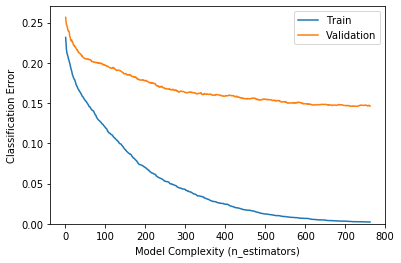

In [121]:
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
#plt.ylim((0.18, 0.22)) # Zoom in
plt.ylim((0.0, .27))
plt.legend();

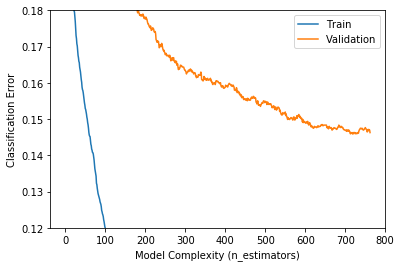

In [122]:
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0.12, 0.18)) # Zoom in

plt.legend();